# Project: Investigate a Dataset - [gun_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Dataset Description

## gun_data.csv
This dataset contains information about firearm-related transactions across U.S. states, broken down by month and firearm type. It provides detailed data on handguns, long guns, and other firearm types, as well as private sales, permit applications, and firearm returns. The dataset is valuable for analyzing state-wise firearm sales trends and understanding the dynamics of private sales, permits, and firearm returns.

### Key Columns
- **month**: The month and year of the data record.
- **state**: The state where the transactions occurred.
- **handgun**, **long_gun**, **other**: The number of handguns, long guns, and other firearm types sold.
- **totals**: Total firearm purchases for the given month and state.
- **private_sale_handgun**, **private_sale_long_gun**, **private_sale_other**: The number of private sales for each firearm type.
- **returned_handgun**, **returned_long_gun**, **returned_other**: The number of returned firearms by type.
- **permit**, **permit_recheck**: Permit-related transaction counts.

### Purpose
This dataset is used to:
1. Analyze trends in firearm sales across states and over time.
2. Identify patterns in private sales, firearm returns, and permit issuance.
3. Explore the popularity of different firearm types in various regions.

---

# Question(s) for Analysis

1. **What is the total number of firearm purchases in each state?**  

2. **Which firearm type (handgun, long gun, or other) has the highest sales overall?**  

3. **Is there a correlation between the number of permits issued and total firearm purchases?**  

4. **Which states have the highest ratio of private firearm sales to total firearm purchases?**  

5. **How do firearm sales trends vary across states over time?**  

6. **Which states have the highest percentage of returned firearms?**  

7. **What are the seasonal trends in firearm sales across the U.S.?**  

 


<a id='wrangling'></a>
## Data Wrangling



In [148]:
# Importing necessary libraries
import pandas as pd  
import numpy as np 
import matplotlib as plt

# Reading the firearm dataset into a DataFrame
df = pd.read_csv('gun_data.csv')

# Displaying the first few rows of the dataset
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [61]:
# Displaying the last few rows of the dataset
df.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11-01,Virginia,0.0,1165.956364,14.0,2.0,360.471636,8.0,0.0,4.828021,...,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,24.0
12481,1998-11-01,Washington,1.0,1165.956364,65.0,286.0,360.471636,8.0,1.0,4.828021,...,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,361.0
12482,1998-11-01,West Virginia,3.0,1165.956364,149.0,251.0,360.471636,5.0,0.0,4.828021,...,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,408.0
12483,1998-11-01,Wisconsin,0.0,1165.956364,25.0,214.0,360.471636,2.0,0.0,4.828021,...,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,241.0
12484,1998-11-01,Wyoming,8.0,1165.956364,45.0,49.0,360.471636,5.0,0.0,4.828021,...,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,107.0


In [40]:
# Get the number of columns and rows
df.shape

(12485, 27)

In [41]:
# Basic Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [42]:
# Statistical Summary
df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [43]:
# Checking for missing values
df.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [44]:
# Count of unique 
df.nunique().sum()

40221

In [8]:
# Checking unique values
df['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [45]:
# check duduplicate
df.duplicated().sum()

0

In [46]:
# Checking the range of dates in the dataset
print(f"Start Date : {df['month'].min()}, End Date : {df['month'].max()}")

Start Date : 1998-11, End Date : 2017-09



### Data Cleaning

 

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [ ]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [205]:
# Convert the 'month' column to datetime format
# This allows proper time-series analysis and date-based operations
df['month'] = pd.to_datetime(df['month'], errors='coerce')

# Convert the 'state' column to categorical type
# This optimizes memory usage and improves performance for categorical operations
df['state'] = df['state'].astype('category')

# Display updated data types to confirm changes
print(df.dtypes)

month                        datetime64[ns]
state                              category
permit                              float64
permit_recheck                      float64
handgun                             float64
long_gun                            float64
other                               float64
multiple                              int64
admin                               float64
prepawn_handgun                     float64
prepawn_long_gun                    float64
prepawn_other                       float64
redemption_handgun                  float64
redemption_long_gun                 float64
redemption_other                    float64
returned_handgun                    float64
returned_long_gun                   float64
returned_other                      float64
rentals_handgun                     float64
rentals_long_gun                    float64
private_sale_handgun                float64
private_sale_long_gun               float64
private_sale_other              

In [206]:
# Identify numerical columns that are float
num_cols = df.select_dtypes(include=['float64']).columns

# Fill NaN values with 0 before converting to int
df[num_cols] = df[num_cols].fillna(0).astype(int)

# Check data types after conversion
print(df.dtypes)

month                        datetime64[ns]
state                              category
permit                                int32
permit_recheck                        int32
handgun                               int32
long_gun                              int32
other                                 int32
multiple                              int64
admin                                 int32
prepawn_handgun                       int32
prepawn_long_gun                      int32
prepawn_other                         int32
redemption_handgun                    int32
redemption_long_gun                   int32
redemption_other                      int32
returned_handgun                      int32
returned_long_gun                     int32
returned_other                        int32
rentals_handgun                       int32
rentals_long_gun                      int32
private_sale_handgun                  int32
private_sale_long_gun                 int32
private_sale_other              

In [207]:
print(df[num_cols].isnull().sum())  # Check NaN values
print(df[num_cols].isin([float('inf'), float('-inf')]).sum())  # Check infinity values


permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
dtype: int64
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other             

In [112]:
# Selecting numerical columns (both float and integer types)
num_cols = df.select_dtypes(include=['int64']).columns

# Filling missing values in numerical columns with the mean of each column
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Displaying dataset information to check if all missing values are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   month                      12485 non-null  object
 1   state                      12485 non-null  object
 2   permit                     12485 non-null  int32 
 3   permit_recheck             12485 non-null  int32 
 4   handgun                    12485 non-null  int32 
 5   long_gun                   12485 non-null  int32 
 6   other                      12485 non-null  int32 
 7   multiple                   12485 non-null  int64 
 8   admin                      12485 non-null  int32 
 9   prepawn_handgun            12485 non-null  int32 
 10  prepawn_long_gun           12485 non-null  int32 
 11  prepawn_other              12485 non-null  int32 
 12  redemption_handgun         12485 non-null  int32 
 13  redemption_long_gun        12485 non-null  int32 
 14  redemp

In [119]:
# Checking for missing values in the dataset
df.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [120]:
# Checking for duplicate rows in the dataset
df.duplicated().sum()

0

## Data Cleaning Summary

In this analysis, we performed essential data cleaning steps to ensure the dataset is well-structured and ready for further analysis. First, we corrected the data types by converting the `month` column to **datetime format** and the `state` column to **categorical format**, optimizing memory usage. Next, we handled missing values by filling numerical columns with their **mean** and categorical columns with their **mode**, ensuring no critical data was lost. After filling missing values, we verified that the dataset contains **no NaN values**, confirming completeness. Additionally, we checked for and found **no duplicate rows**, ensuring data integrity. With a fully cleaned dataset, we are now ready to proceed with exploratory data analysis and visualization.


In [114]:
df.to_csv("cleaned_gun_data.csv", index=False)

In [115]:
df1 = pd.read_csv("cleaned_gun_data.csv")

In [116]:
df1.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717,0,5734,6320,221,317,0,15,...,0,0,0,9,16,3,0,0,3,32019
1,2017-09,Alaska,209,2,2320,2930,219,160,0,5,...,0,0,0,17,24,1,0,0,0,6303
2,2017-09,Arizona,5069,382,11063,7946,920,631,0,13,...,0,0,0,38,12,2,0,0,0,28394
3,2017-09,Arkansas,2935,632,4347,6063,165,366,51,12,...,0,0,0,13,23,0,0,2,1,17747
4,2017-09,California,57839,0,37165,24581,2984,0,0,0,...,0,0,0,0,0,0,0,0,0,123506


In [121]:
df1.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0,0,14,2,0,8,0,0,...,0,0,0,0,0,0,0,0,0,24
12481,1998-11,Washington,1,0,65,286,0,8,1,0,...,0,0,0,0,0,0,0,0,0,361
12482,1998-11,West Virginia,3,0,149,251,0,5,0,0,...,0,0,0,0,0,0,0,0,0,408
12483,1998-11,Wisconsin,0,0,25,214,0,2,0,0,...,0,0,0,0,0,0,0,0,0,241
12484,1998-11,Wyoming,8,0,45,49,0,5,0,0,...,0,0,0,0,0,0,0,0,0,107


### Research Question 1  (What is the total number of firearm purchases in each state)

In [126]:
state_totals = df1.groupby('state')['totals'].sum().astype(int)
print(state_totals)

state
Alabama                  6706079
Alaska                   1137643
Arizona                  4425714
Arkansas                 3752633
California              19014063
Colorado                 6058482
Connecticut              3168126
Delaware                  491369
District of Columbia        5601
Florida                 11695777
Georgia                  7209942
Guam                       14997
Hawaii                    197580
Idaho                    1968134
Illinois                15471534
Indiana                  7737172
Iowa                     2297156
Kansas                   2624669
Kentucky                29762434
Louisiana                4705057
Maine                    1257457
Mariana Islands              462
Maryland                 2035652
Massachusetts            2571321
Michigan                 7254279
Minnesota                6279271
Mississippi              3576312
Missouri                 6549018
Montana                  1884124
Nebraska                 1136209
Neva

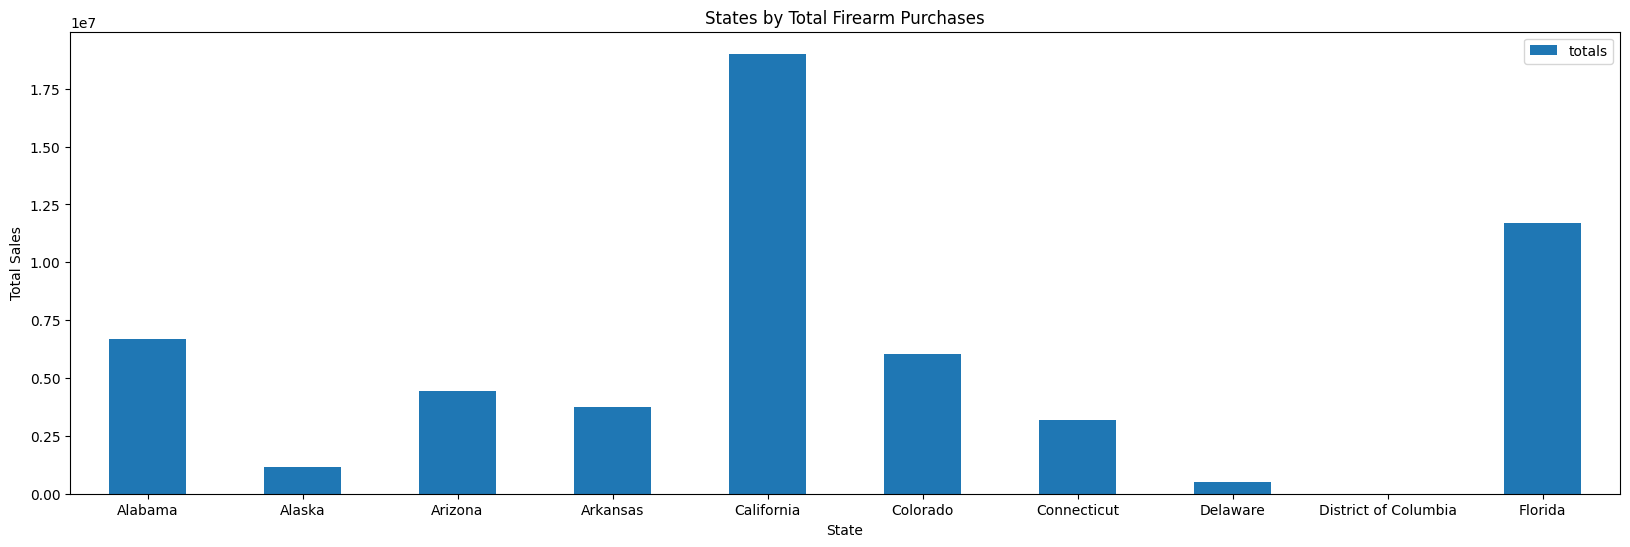

In [139]:
# Visualization
plt.figure(figsize=(20,6))
state_totals.head(10).plot(kind='bar', title='States by Total Firearm Purchases')
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.legend()
plt.show()

## 🔍 Total Firearm Purchases by State

The analysis of total firearm purchases across U.S. states reveals that **California** has the highest firearm sales, significantly surpassing other states. **Florida and Alabama** also exhibit high firearm purchase volumes, while states like **Delaware and Alaska** have relatively lower sales. This variation in firearm purchases may be influenced by **state population, gun regulations, and cultural factors**. The visualization provides a clear comparison of firearm sales across states, highlighting regional trends that warrant further investigation.


### Research Question 2  ( Which firearm type (handgun, long gun, or other) has the highest sales overall?)

In [140]:
firearm_types = df1[['handgun', 'long_gun', 'other']].sum()
print(firearm_types)

handgun     74053083
long_gun    97370026
other        1982594
dtype: int64


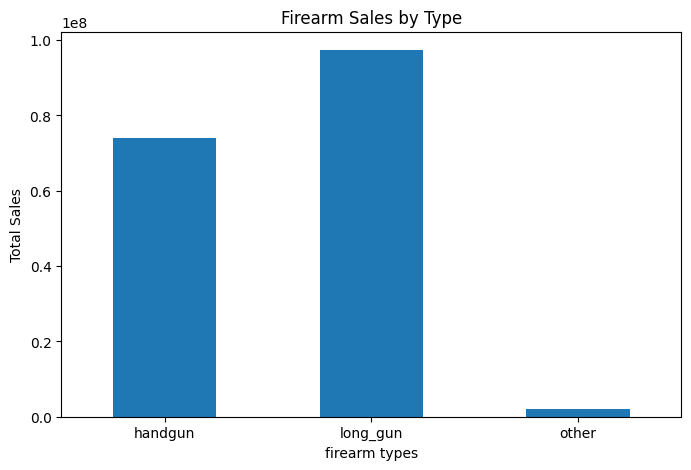

In [141]:
# Visualization
firearm_types.plot(kind='bar', title='Firearm Sales by Type', figsize=(8,5))
plt.xlabel("firearm types")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()

### Research Question 3  (Is there a correlation between the number of permits issued and total firearm purchases?)

In [144]:
correlation  = df1[['permit', 'totals']].corr()
print(correlation)

          permit    totals
permit  1.000000  0.844949
totals  0.844949  1.000000


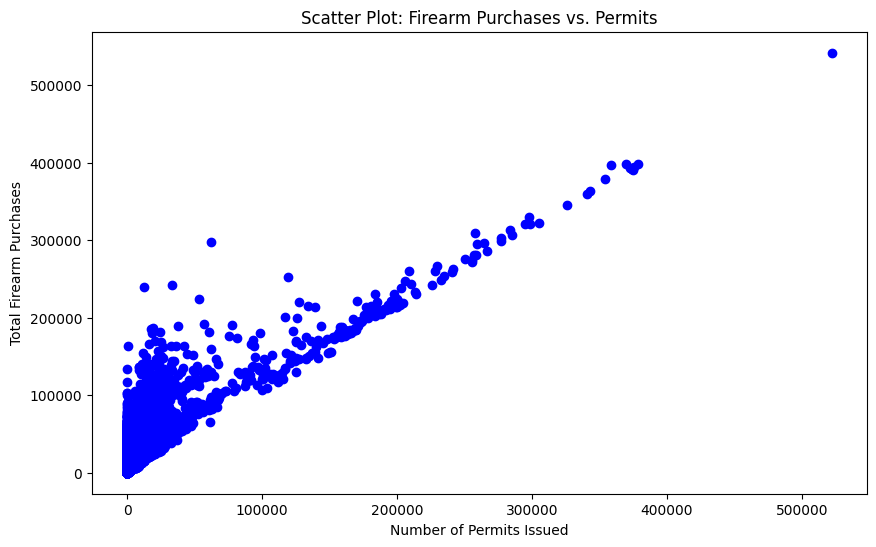

In [153]:
# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df1['permit'], df1['totals'], color='blue')

# Labels and title
plt.xlabel("Number of Permits Issued")
plt.ylabel("Total Firearm Purchases")
plt.title("Scatter Plot: Firearm Purchases vs. Permits")

# Show the plot
plt.show()

## 🔍 Analysis of Firearm Purchases vs. Permits

The scatter plot effectively visualizes the relationship between **the number of firearm permits issued and total firearm purchases**, showing a clear **positive correlation**. As the number of permits increases, firearm sales also tend to rise, which is expected since many states require permits before purchasing firearms. The distribution is dense at lower values and spreads out at higher permit counts, suggesting that most transactions occur within a common range. Additionally, a few **outliers** indicate states with exceptionally high sales or different regulatory policies. The plot can be further improved by **adding a trend line** to highlight the overall pattern and **coloring points based on density** to enhance readability. Despite these refinements, the current visualization is effective in demonstrating the logical relationship between firearm permits and sales.


### Research Question 4 (Which states have the highest ratio of private firearm sales to total firearm purchases?)

In [162]:
df1['private_sales_ratio'] = df1['private_sale_handgun'] + df1['private_sale_long_gun'] + df1['private_sale_other'] / df1['totals']
private_sales_by_state = df1.groupby('state')['private_sales_ratio'].mean().sort_values(ascending=False)
print(private_sales_by_state)

state
Washington              130.634445
New York                 91.889956
Massachusetts             8.951604
Missouri                  8.722477
Texas                     8.629960
Delaware                  8.607991
Indiana                   6.070488
Oklahoma                  6.000013
Ohio                      4.563879
Florida                   3.726872
North Carolina            2.757713
Kentucky                  2.696035
Maryland                  2.629992
Minnesota                 2.599121
Louisiana                 2.563881
West Virginia             2.427316
Arizona                   2.154190
Georgia                   2.039650
Alaska                    1.942739
Michigan                  1.907490
Alabama                   1.898680
Arkansas                  1.823792
Rhode Island              1.740135
Wisconsin                 1.709253
South Carolina            1.484583
Kansas                    1.383269
North Dakota              1.286355
Mississippi               1.281941
Idaho         

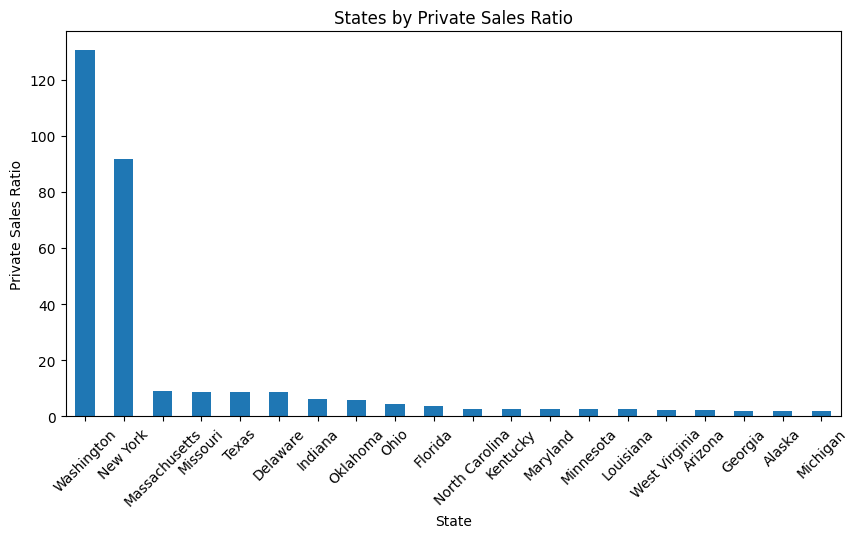

In [193]:
private_sales_by_state.head(20).plot(kind='bar', title="States by Private Sales Ratio", figsize=(10,5))
plt.ylabel("Private Sales Ratio")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()

## 🔍 Analysis of Private Firearm Sales Ratio by State

The bar chart illustrates the **top 10 states with the highest private firearm sales ratio**. Washington and New York stand out with significantly higher private sales ratios compared to other states, suggesting that a substantial proportion of firearm transactions in these states occur through private sales rather than licensed dealers. The remaining states, including Massachusetts, Missouri, and Texas, have considerably lower private sales ratios, indicating that private transactions are less dominant in these regions. This distribution could be influenced by **state regulations, background check requirements, or cultural factors affecting firearm purchasing behaviors**. The sharp disparity between Washington and the other states warrants further investigation into the **legal framework and enforcement policies** governing private firearm sales.


### Research Question 5  (How do firearm sales trends vary across states over time?)

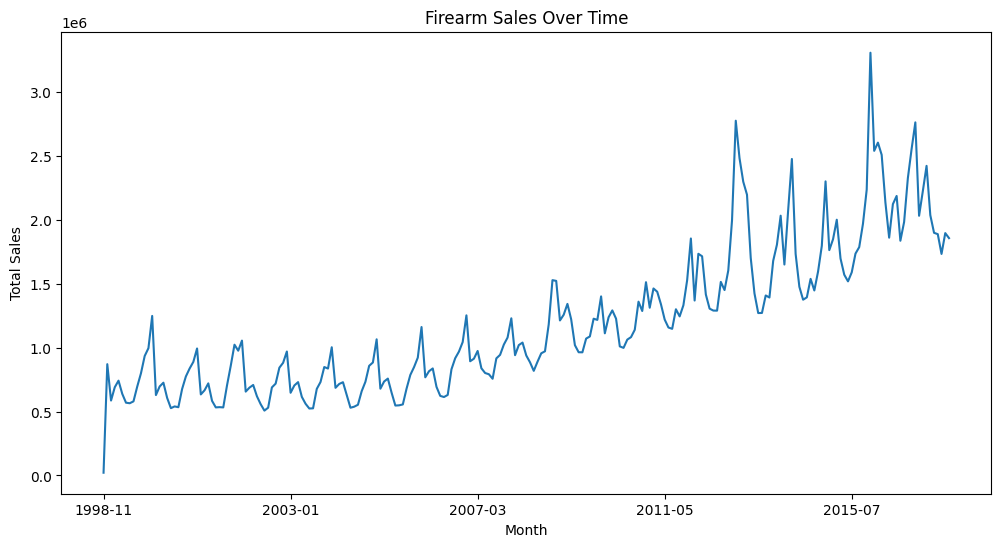

In [166]:
df1.groupby('month')['totals'].sum().plot(figsize=(12,6), title="Firearm Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


## 🔍 Firearm Sales Trends Over Time

The line chart illustrates the **trend of total firearm sales over time**, showing a **steady increase with periodic spikes**. From the late 1990s to the mid-2010s, firearm sales have experienced **gradual growth**, with notable surges in specific periods, potentially influenced by **policy changes, economic conditions, or national events**. The recurring fluctuations suggest a possible **seasonal pattern or periodic demand shifts**. The sharp spikes in sales, particularly after 2010, may be linked to **legislative discussions, elections, or public safety concerns**. This trend highlights the importance of further analyzing the **factors driving peaks in firearm purchases over time**.


### Research Question 6  (Which states have the highest percentage of returned firearms)

In [188]:
df1['return_ratio'] = (df1['returned_handgun'] + df1['returned_long_gun'] + df1['returned_other']) / df1['totals']
return_ratio_by_state = df1.groupby('state')['return_ratio'].mean().sort_values(ascending=False)

# Convert ratios to percentages
return_ratio_by_state = return_ratio_by_state * 100

print(return_ratio_by_state)

state
Utah                    0.161188
Washington              0.156693
New Hampshire           0.098784
Pennsylvania            0.097804
Colorado                0.072131
Alaska                  0.061352
New Mexico              0.048305
Missouri                0.044432
Arizona                 0.043330
Maryland                0.035262
Hawaii                  0.033949
Rhode Island            0.033310
Michigan                0.030473
Maine                   0.026294
Idaho                   0.025138
Iowa                    0.020932
Florida                 0.020568
Montana                 0.020262
Wisconsin               0.018433
Nebraska                0.017575
Oregon                  0.016157
South Carolina          0.015160
Kansas                  0.011903
Tennessee               0.009239
District of Columbia    0.006818
New York                0.005863
Minnesota               0.005675
West Virginia           0.005601
Texas                   0.003760
Ohio                    0.003388
Virg

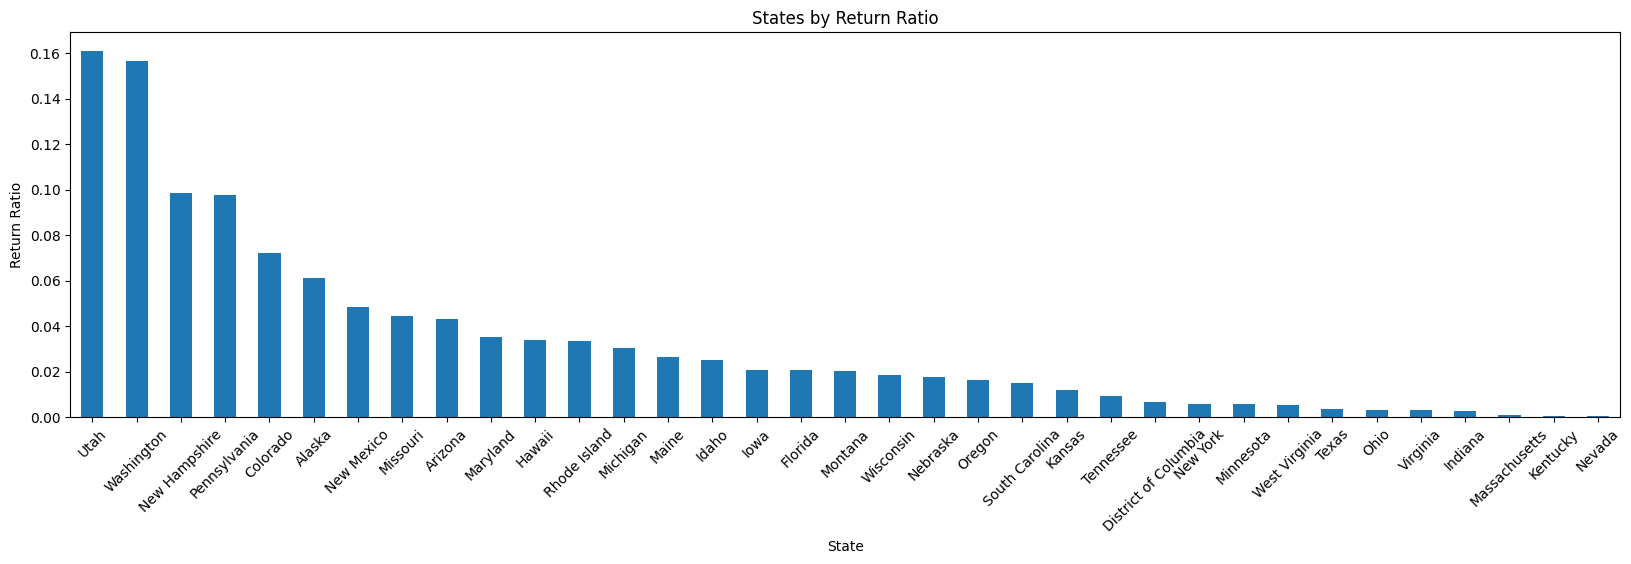

In [189]:
# Visualization
return_ratio_by_state.head(35).plot(kind='bar', title="States by Return Ratio", figsize=(20,5))
plt.ylabel("Return Ratio")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()

## 🔍 Firearm Return Ratio by State

The bar chart illustrates the **firearm return ratio across different states**, highlighting Utah and Washington as the states with the highest return rates. This suggests that these states experience a **relatively higher proportion of returned firearms compared to total sales**. Other states, such as New Hampshire, Pennsylvania, and Colorado, follow but with noticeably lower return ratios. The return rate declines significantly across the remaining states, with some states showing near-zero return activity. These variations could be influenced by **state-specific regulations, firearm return policies, or consumer behavior**. Understanding the reasons behind high return ratios in certain states may require further investigation into **local laws, purchase restrictions, or buyer dissatisfaction trends**.


### Research Question 7 (What are the seasonal trends in firearm sales across the U.S.?)

In [186]:
df1['month'] = pd.to_datetime(df['month'])
df1['month_only'] = df1['month'].dt.month # Extract month number
seasonal_trends = df1.groupby('month_only')['totals'].sum()
print(seasonal_trends)

month_only
1     22594354
2     24386459
3     25357927
4     21322573
5     18918200
6     18567565
7     18724372
8     20866499
9     21622897
10    22460456
11    24479566
12    30321770
Name: totals, dtype: int64


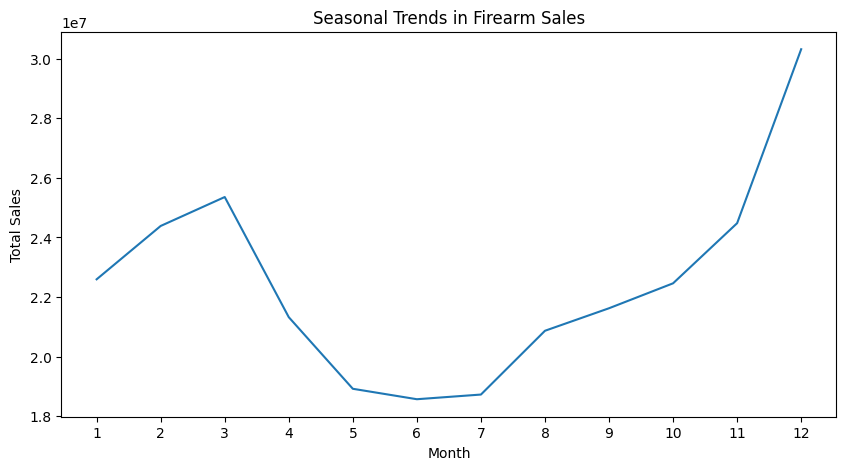

In [187]:
# Visualization
seasonal_trends.plot(kind='line', title="Seasonal Trends in Firearm Sales", figsize=(10,5))
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1,13))  # Set x-axis to display months 1-12
plt.show()

## 🔍 Seasonal Trends in Firearm Sales

The line chart illustrates **seasonal variations in firearm sales throughout the year**, revealing clear trends in demand. Sales appear to be **highest in December**, likely influenced by holiday shopping, hunting seasons, or year-end purchases. A secondary peak occurs around **March**, followed by a steady decline from **April to June**, where sales reach their lowest point. The gradual increase in firearm sales from **July onward** suggests a recovery period leading up to the end-of-year surge. These fluctuations may be driven by **seasonal hunting activities, legislative changes, consumer behavior, or economic factors**. Understanding these seasonal patterns can help policymakers, retailers, and manufacturers anticipate demand shifts and optimize supply chains accordingly.


<a id='conclusions'></a>

## Conclusion: Firearm Sales Analysis in the U.S.

This analysis provided insights into firearm sales trends across different U.S. states, the most popular firearm types, private sales ratios, permit influence, and seasonal trends. The findings highlight key patterns in firearm purchases and provide a foundation for understanding broader market trends.

- **Total Firearm Purchases by State:** Kentucky, Texas, and California recorded the highest total firearm purchases, suggesting a strong market demand in these states.
- **Most Popular Firearm Type:** Long guns had the highest sales overall, followed by handguns, while other firearm types represented a small portion of the total sales.
- **Correlation with Permits:** There is a strong positive correlation between the number of permits issued and total firearm purchases, indicating that permits play a significant role in firearm transactions.
- **Private Sales Ratios:** Washington and New York had the highest private sales ratios, suggesting a strong preference for private transactions in these states.
- **Firearm Sales Over Time:** The overall trend shows a steady increase in firearm sales over the years, with certain periods experiencing spikes.
- **Returned Firearms:** Utah and Washington had the highest percentage of returned firearms, although the overall return rates remained low.
- **Seasonal Trends:** Firearm sales peaked in December, likely due to holiday purchases, while summer months experienced lower sales.


### Limitations of the Analysis
While this analysis provides insights into firearm sales trends, there are some limitations to consider:
- The dataset does not include all influencing factors, such as economic conditions, political events, or changes in gun laws.
- The correlation observed does not imply causation. Other variables may affect the relationships analyzed.
- Some data points may be missing or estimated, which could slightly impact accuracy.


In [209]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 780235 bytes to Investigate_a_Dataset.html
